In [50]:
source("cqr_function.R")

alpha=0.1
nrep=100

dim = c("concrete")

evaluations <- expand.grid(1:nrep, dim, c("efficient", "valid"))
no_eval <- nrow(evaluations)
ntree_mat <- beta_mat <- cqr_method_mat <- width_mat <- cov_mat <- data.frame(number = rep(0, no_eval), 
                                   rep = evaluations[,1], 
                                   dim = evaluations[,2],
                                   method = evaluations[,3])
colnames(width_mat) <- colnames(cov_mat) <- c("number", "rep", "dim", "method")


for(idx in 1:nrow(evaluations)){
  set.seed(evaluations[idx, 1])
  if(idx%%1 == 0){
    print(idx)
  }
  d <- evaluations[idx, 2]  
  
  if (d =="protein"){
    
    protein=as.matrix(read.csv("CASP.csv",header=TRUE))
    X_full=protein[,2:9]
    Y_full=protein[,1]
    
    
    
  }else if (d=="blog"){
    
    blog=as.matrix(read.csv("blogData_train.csv",header=FALSE))
    X_full=blog[,1:280]
    Y_full=blog[,281]


  }else if (d=="concrete"){
    concrete=as.matrix(read.csv("concrete.csv",header=FALSE,sep=","))
    X_full=concrete[,1:8]
    Y_full=concrete[,9]
    


  }else if (d=="news"){
    news=as.matrix(read.csv("OnlineNewsPopularity.csv",header=FALSE))
    X_full=news[,1:59]
    Y_full=news[,60]

    
  }else if (d=="kernel"){
    kernel=as.matrix(read.csv("sgemm_product.csv",header=FALSE))
    X_full=kernel[,1:14]
    Y_full=apply(kernel[,15:18],1,mean)

    
  }else if (d=="superconduct"){
    superconduct=as.matrix(read.csv("train.csv",header=FALSE))
    X_full=superconduct[,1:81]
    Y_full=superconduct[,82]
  }
  
  subSampleSize = 1000; 
  rows=sample(nrow(X_full))
  X_sample = X_full[rows[1:subSampleSize],]
  Y_sample = Y_full[rows[1:subSampleSize]]
  X=X_sample[1:768,]
  X0=X_sample[769:1000,]
  Y=Y_sample[1:768]
  Y0=Y_sample[769:1000]
  
  
  width_mat[idx,3] <- cov_mat[idx, 3] <- d
  method <- evaluations[idx, 3]
  width_mat[idx,4] <- cov_mat[idx, 4] <- method
  width_mat[idx, 2] <- cov_mat[idx, 2] <- evaluations[idx, 1]
  
  if(method == "valid"){
    split <- c(1/2, 1/2)
  } else {
    split <- 1/2
  }  
  
  p = dim(X0)[2]
  beta_grid <- seq(1e-03, 4, length = 10)*alpha
  mtry_grid <- unique(ceiling(seq(1/10, 1, length = 10)*p))
  ntree_grid <- seq(100, 400, by = 100)
  

  
  tmp =   try(conf_CQR_reg(X, Y, split = split, beta_grid, mtry_grid, ntree_grid, method = method, alpha = alpha))
  
  while (class(tmp)=="try-error"){
    
    tmp =   try(conf_CQR_reg(X, Y, split = split, beta_grid, mtry_grid, ntree_grid, method = method, alpha = alpha),silent=TRUE)
    
  }
  
  beta_mat[idx,1] = tmp$beta
  ntree_mat[idx,1] = tmp$ntree  
  cqr_method_mat[idx, 1]= tmp$cqr_method      
  width_mat[idx, 1] <- mean(tmp$pred_set(X0, Y0)[[2]])
  cov_mat[idx, 1] <- mean(tmp$pred_set(X0, Y0)[[1]])
  

  
}



[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

In [51]:
par(mfrow = c(1,2))
width_efcp <- width_vfcp <- sd_width_efcp <- sd_width_vfcp <- NULL
for(d in dim){
  TMP <- width_mat[evaluations[,3] == "efficient", ]
  TMP_prime <- TMP[TMP[,3] == d,]
  
  TMP <- width_mat[evaluations[,3] == "valid", ]
  TMP_prime_vfcp <- TMP[TMP[,3] == d,]
  
  
  width_efcp <- c(width_efcp, mean(TMP_prime[,1] / TMP_prime_vfcp[,1]))
  sd_width_efcp <- c(sd_width_efcp, sd(TMP_prime[,1]/ TMP_prime_vfcp[,1])/sqrt(nrep))
  

  width_vfcp <- c(width_vfcp, mean(TMP_prime_vfcp[,1] / TMP_prime_vfcp[,1]))
  sd_width_vfcp <- c(sd_width_vfcp, sd(TMP_prime_vfcp[,1]/ TMP_prime_vfcp[,1])/sqrt(nrep))
}

cov_efcp <- cov_vfcp <-sd_cov_efcp <- sd_cov_vfcp <- NULL
for(d in dim){
  TMP <- cov_mat[evaluations[,3] == "efficient", ]
  TMP_prime <- TMP[TMP[,3] == d,]
  cov_efcp <- c(cov_efcp, mean(TMP_prime[,1]))
  sd_cov_efcp <- c(sd_cov_efcp, sd(TMP_prime[,1])/sqrt(nrep))
  
  TMP <- cov_mat[evaluations[,3] == "valid", ]
  TMP_prime <- TMP[TMP[,3] == d,]
  cov_vfcp <- c(cov_vfcp, mean(TMP_prime[,1]))
  sd_cov_vfcp <- c(sd_cov_vfcp, sd(TMP_prime[,1])/sqrt(nrep))
}

#save(dim,width_mat, cov_mat, evaluations, width_efcp, sd_cov_efcp, sd_width_vfcp,sd_width_efcp,width_vfcp, sd_cov_vfcp, cov_efcp, cov_vfcp, file = "real-100-repetitions.RData" )


#plot(dim, width_efcp, type = 'l', ylim = range(c(width_efcp+sd_efcp)), lwd = 2)



In [55]:
par(mfrow = c(1,2))
width_efcp <- width_vfcp <- sd_width_efcp <- sd_width_vfcp <- NULL
for(d in dim){
  TMP <- width_mat[evaluations[,3] == "efficient", ]
  TMP_prime <- TMP[TMP[,3] == d,]
  
  TMP <- width_mat[evaluations[,3] == "valid", ]
  TMP_prime_vfcp <- TMP[TMP[,3] == d,]
  
  
  width_efcp <- c(width_efcp, mean(TMP_prime[,1] ))
  sd_width_efcp <- c(sd_width_efcp, sd(TMP_prime[,1])/sqrt(nrep))
  

  width_vfcp <- c(width_vfcp, mean(TMP_prime_vfcp[,1] ))
  sd_width_vfcp <- c(sd_width_vfcp, sd(TMP_prime_vfcp[,1])/sqrt(nrep))
}

cov_efcp <- cov_vfcp <-sd_cov_efcp <- sd_cov_vfcp <- NULL
for(d in dim){
  TMP <- cov_mat[evaluations[,3] == "efficient", ]
  TMP_prime <- TMP[TMP[,3] == d,]
  cov_efcp <- c(cov_efcp, mean(TMP_prime[,1]))
  sd_cov_efcp <- c(sd_cov_efcp, sd(TMP_prime[,1])/sqrt(nrep))
  
  TMP <- cov_mat[evaluations[,3] == "valid", ]
  TMP_prime <- TMP[TMP[,3] == d,]
  cov_vfcp <- c(cov_vfcp, mean(TMP_prime[,1]))
  sd_cov_vfcp <- c(sd_cov_vfcp, sd(TMP_prime[,1])/sqrt(nrep))
}

#save(dim,width_mat, cov_mat, evaluations, width_efcp, sd_cov_efcp, sd_width_vfcp,sd_width_efcp,width_vfcp, sd_cov_vfcp, cov_efcp, cov_vfcp, file = "real-100-repetitions.RData" )


#plot(dim, width_efcp, type = 'l', ylim = range(c(width_efcp+sd_efcp)), lwd = 2)




In [64]:
width_vfcp
width_efcp

[1] 19.09966

[1] 17.98641

Compare this to the smallest width 18.19 achieved by QOOB in Table 2 of Gupta et al 2020 paper.

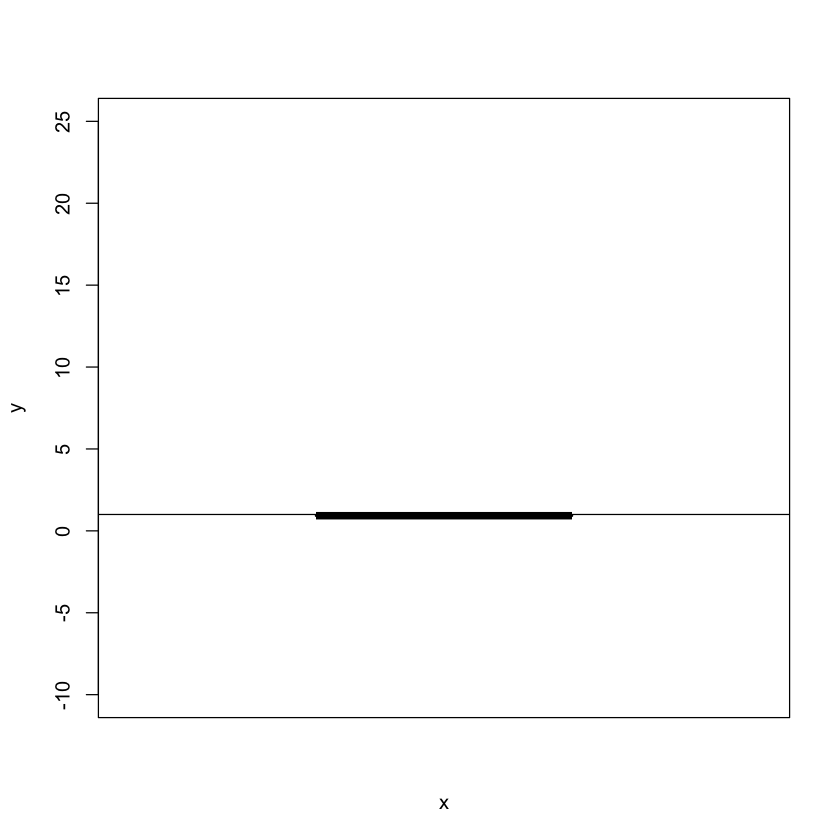

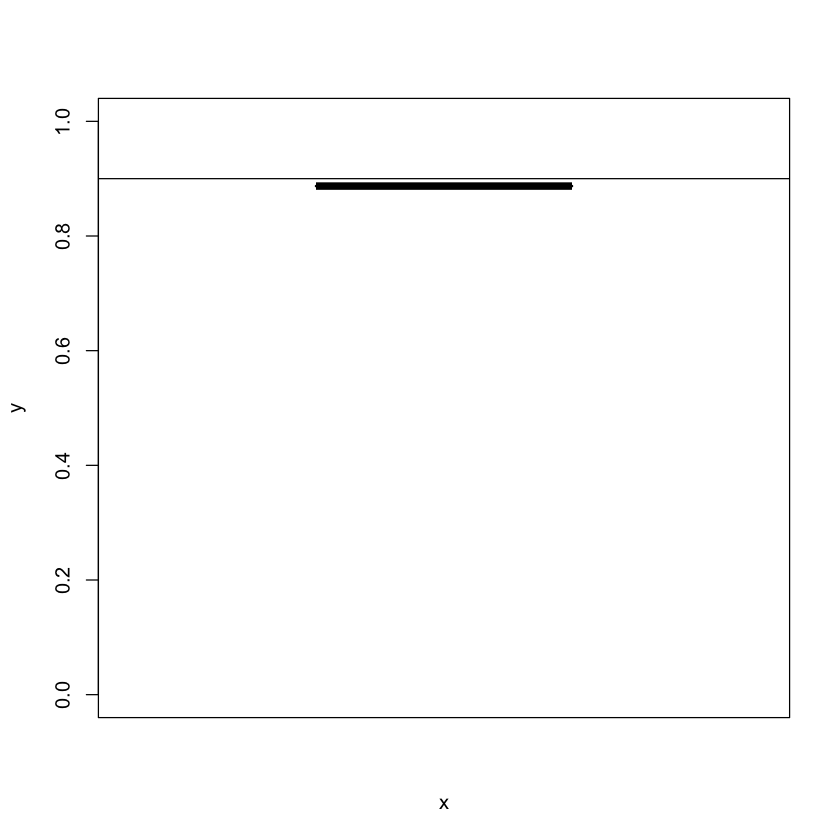

In [39]:
dim=factor(dim)
plot(dim, width_efcp, type = 'l', ylim =c(-10,25), lwd = 2)
lines(dim, width_efcp - sd_width_efcp, type = 'l', lty = 2, lwd = 2)
lines(dim, width_efcp + sd_width_efcp, type = 'l', lty = 2, lwd = 2)
lines(dim, width_vfcp, type = 'l', ylim = range(c(width_efcp, width_vfcp)), lwd = 2, col = "red")
lines(dim, width_vfcp - sd_width_vfcp, type = 'l', lty = 2, lwd = 2, col = "red")
lines(dim, width_vfcp + sd_width_vfcp, type = 'l', lty = 2, lwd = 2, col = "red")
abline(h = 1)


plot(dim, cov_efcp, type = 'l', ylim = c(0, 1), lwd = 2)
lines(dim, cov_vfcp, type = 'l', col = "red", lwd = 2)
abline(h = 1-alpha)



In [59]:
hist(beta_opt,breaks=beta_grid,main = "Use of beta")

ERROR: Error in hist(beta_opt, breaks = beta_grid, main = "Use of beta"): object 'beta_opt' not found


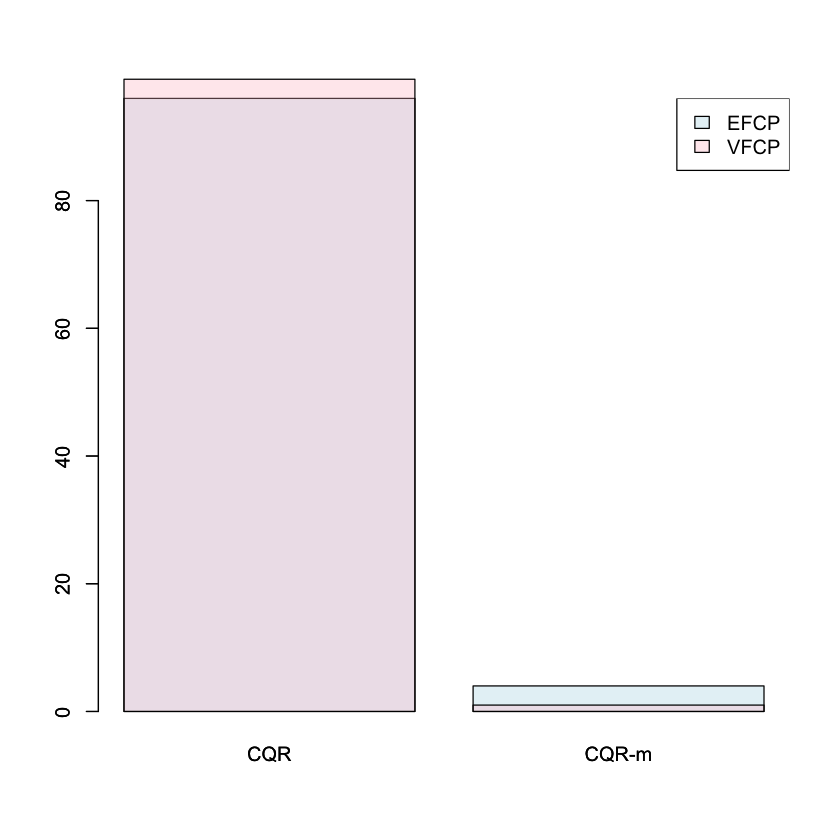

In [60]:
c1 <- rgb(173,216,230,max = 255, alpha = 80, names = "lt.blue")
c2 <- rgb(255,192,203, max = 255, alpha = 80, names = "lt.pink")

plot(factor(cqr_method_mat[evaluations[,3] == "valid",1]),col=c1)
plot(factor(cqr_method_mat[evaluations[,3] == "efficient",1]),col=c2,add=TRUE)

legend("topright", legend=c("EFCP", "VFCP"),
       fill=c(c1, c2))

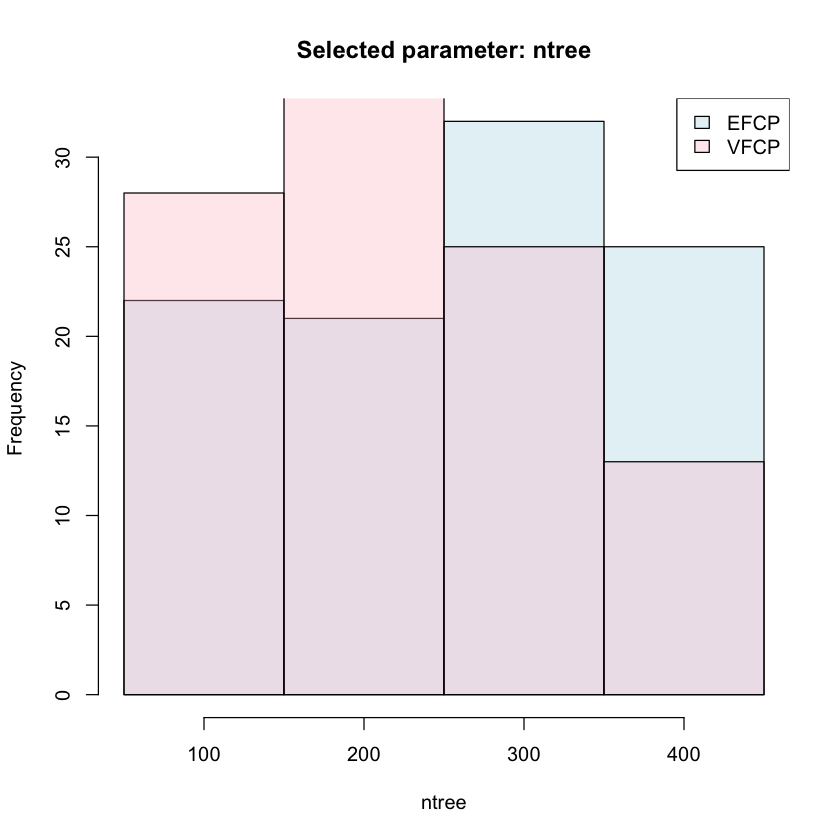

In [61]:
hist(ntree_mat[evaluations[,3] == "efficient",1],col=c1,breaks=c(50,ntree_grid+50),main="Selected parameter: ntree",xlab="ntree")
hist(ntree_mat[evaluations[,3] == "valid",1],col=c2,breaks=c(50,ntree_grid+50),add=TRUE)

legend("topright", legend=c("EFCP", "VFCP"),
       fill=c(c1, c2))

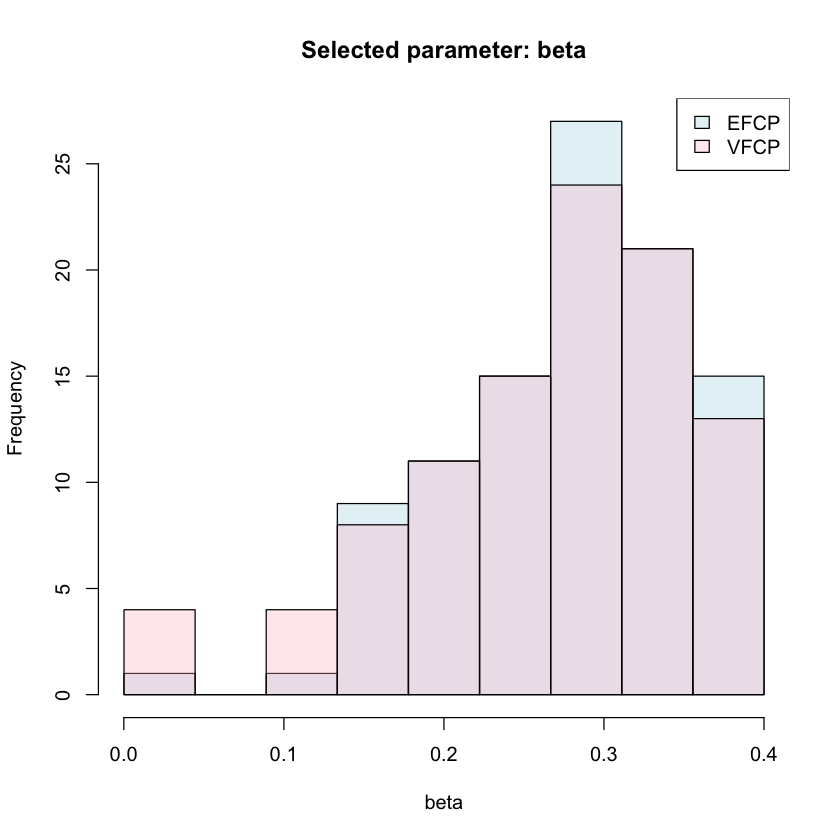

In [62]:
hist(beta_mat[evaluations[,3] == "efficient",1],col=c1,breaks=beta_grid,main="Selected parameter: beta",xlab="beta")
hist(beta_mat[evaluations[,3] == "valid",1],col=c2,breaks=beta_grid,add=TRUE)

legend("topright", legend=c("EFCP", "VFCP"),
       fill=c(c1, c2))

This supports the decision in Gupta et al. 2020 paper to use the nominal quantile level $\beta = 2\alpha$.

In [63]:
hist(mtry_mat[evaluations[,3] == "efficient",1],col=c1,breaks=mtry_grid,main="Selected parameter: beta",xlab="beta")
hist(mtry_mat[evaluations[,3] == "valid",1],col=c2,breaks=mtry_grid,add=TRUE)

legend("topright", legend=c("EFCP", "VFCP"),
       fill=c(c1, c2))

ERROR: Error in hist(mtry_mat[evaluations[, 3] == "efficient", 1], col = c1, : object 'mtry_mat' not found
